# FPL-Simulator Data Scraper
### Jupyter notebook that uses https://www.api-football.com to fetch up to date information about fixtures and teams in the Premier League

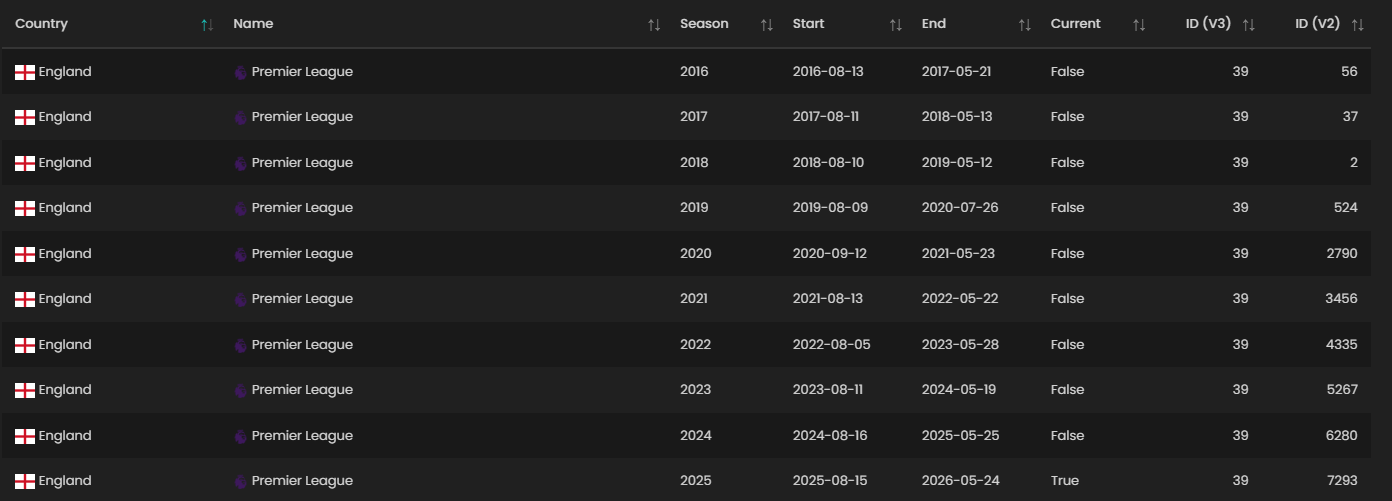

In [1]:
import requests
import http.client
import json

In [2]:
API_KEY = "fb5d179556e47eac911953572e8fc472"
URL = "https://v3.football.api-sports.io"
PREMIER_LEAGUE_ID = "39"

#### Make a request

In [3]:
def make_request(api_key):
  url = "https://v3.football.api-sports.io/leagues"

  payload={}
  headers = {
    'x-rapidapi-key': api_key,
    'x-rapidapi-host': 'v3.football.api-sports.io'
  }

  response = requests.request("GET", url, headers=headers, data=payload)
  data = response.json()

  return data

### Getting fixtures!

In [4]:
def getFixtures(leagueID, season):
    query_string = {
        "league" : leagueID,
        "season" : season
    }

    headers = {
    'x-rapidapi-key': API_KEY,
    'x-rapidapi-host': 'v3.football.api-sports.io'
    }

    url = URL + "/fixtures"

    response = requests.get(url, headers=headers, params=query_string)
    data = response.json()

    return data

In [5]:
def getTeams(leagueID, season):
    query_string = {
        "league" : leagueID,
        "season" : season
    }

    headers = {
    'x-rapidapi-key': API_KEY,
    'x-rapidapi-host': 'v3.football.api-sports.io'
    }

    url = URL + "/teams"

    response = requests.get(url, headers=headers, params=query_string)
    data = response.json()

    return data

In [6]:
fixtureJSON2023 = getFixtures(PREMIER_LEAGUE_ID, "2023")
teamJSON2023 = getTeams(PREMIER_LEAGUE_ID, "2023")

In [7]:
print(json.dumps(teamJSON2023["response"], indent=2))

[
  {
    "team": {
      "id": 33,
      "name": "Manchester United",
      "code": "MUN",
      "country": "England",
      "founded": 1878,
      "national": false,
      "logo": "https://media.api-sports.io/football/teams/33.png"
    },
    "venue": {
      "id": 556,
      "name": "Old Trafford",
      "address": "Sir Matt Busby Way",
      "city": "Manchester",
      "capacity": 76212,
      "surface": "grass",
      "image": "https://media.api-sports.io/football/venues/556.png"
    }
  },
  {
    "team": {
      "id": 34,
      "name": "Newcastle",
      "code": "NEW",
      "country": "England",
      "founded": 1892,
      "national": false,
      "logo": "https://media.api-sports.io/football/teams/34.png"
    },
    "venue": {
      "id": 562,
      "name": "St. James' Park",
      "address": "St. James&apos; Street",
      "city": "Newcastle upon Tyne",
      "capacity": 52758,
      "surface": "grass",
      "image": "https://media.api-sports.io/football/venues/562.png"
   

## Create team tuples

In [8]:
allTeams = []

for team in teamJSON2023["response"]:
    #get team section of data
    teamData = team["team"]
    #get name and code of team
    name = teamData["name"]
    code = teamData["code"]
    #create and append tuple
    teamTuple = (name, code)
    allTeams.append(teamTuple)

for tuple in allTeams:
    print(tuple)

('Manchester United', 'MUN')
('Newcastle', 'NEW')
('Bournemouth', 'BOU')
('Fulham', 'FUL')
('Wolves', 'WOL')
('Liverpool', 'LIV')
('Arsenal', 'ARS')
('Burnley', 'BUR')
('Everton', 'EVE')
('Tottenham', 'TOT')
('West Ham', 'WES')
('Chelsea', 'CHE')
('Manchester City', 'MAC')
('Brighton', 'BRI')
('Crystal Palace', 'CRY')
('Brentford', 'BRE')
('Sheffield Utd', 'SHE')
('Nottingham Forest', 'NOT')
('Aston Villa', 'AST')
('Luton', 'LUT')


## Create Fixture List

In [10]:
print(json.dumps(fixtureJSON2023["response"], indent=2))

[
  {
    "fixture": {
      "id": 1035037,
      "referee": "C. Pawson",
      "timezone": "UTC",
      "date": "2023-08-11T19:00:00+00:00",
      "timestamp": 1691780400,
      "periods": {
        "first": 1691780400,
        "second": 1691784000
      },
      "venue": {
        "id": 512,
        "name": "Turf Moor",
        "city": "Burnley"
      },
      "status": {
        "long": "Match Finished",
        "short": "FT",
        "elapsed": 90,
        "extra": null
      }
    },
    "league": {
      "id": 39,
      "name": "Premier League",
      "country": "England",
      "logo": "https://media.api-sports.io/football/leagues/39.png",
      "flag": "https://media.api-sports.io/flags/gb-eng.svg",
      "season": 2023,
      "round": "Regular Season - 1",
      "standings": true
    },
    "teams": {
      "home": {
        "id": 44,
        "name": "Burnley",
        "logo": "https://media.api-sports.io/football/teams/44.png",
        "winner": false
      },
      "away": {

In [11]:
allFixtures = []

for fixture in fixtureJSON2023["response"]:
    teams = fixture["teams"]

    allFixtures.append((teams["home"]["name"], teams["away"]["name"]))

## Write teams to external file

In [53]:
file = open("../allTeams.txt", "w")

for tuple in allTeams:
    file.write(tuple[0] + "," + tuple[1] + "\n")

file.close()

## Write fixtures to external file

In [12]:
file = open("../allFixtures.txt", "w")

for tuple in allFixtures:
    file.write(tuple[0] + "," + tuple[1] + "\n")

file.close()

# Getting Player Data
### Make use of Kaggle databases

In [16]:
import pandas as pd
import kagglehub

In [14]:
# Download Fifa 23 
path = kagglehub.dataset_download("stefanoleone992/fifa-23-complete-player-dataset")
path2022 = path

path = kagglehub.dataset_download("stefanoleone992/ea-sports-fc-24-complete-player-dataset")
path2023 = path

100%|██████████| 28.0M/28.0M [00:02<00:00, 13.6MB/s]

Extracting files...


In [15]:
print(path2022)
print(path2023)

C:\Users\joe_a\.cache\kagglehub\datasets\stefanoleone992\fifa-23-complete-player-dataset\versions\1
C:\Users\joe_a\.cache\kagglehub\datasets\stefanoleone992\ea-sports-fc-24-complete-player-dataset\versions\4


In [62]:
df = pd.read_csv(path2023 + "\male_players.csv")

C:\Users\joe_a\AppData\Local\Temp\ipykernel_32492\2456415530.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path2023 + "\male_players.csv")


In [59]:
attributes = df.columns.to_list()
print(attributes)

['team_id', 'team_url', 'fifa_version', 'fifa_update', 'update_as_of', 'team_name', 'league_id', 'league_name', 'league_level', 'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield', 'defence', 'coach_id', 'home_stadium', 'rival_team', 'international_prestige', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age', 'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line', 'off_style', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks', 'build_up_play_speed', 'build_up_play_dribbling', 'build_up_play_passing', 'build_up_play_positioning', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting', 

#### Get a dataframe of all players from a certain league

In [60]:
def getAllPlayersFromLeague(leagueName):
    return df[df["league_name"] == leagueName]

Get required attributes of all players

In [63]:
leagueName = "Premier League"
allPlayers = getAllPlayersFromLeague(leagueName)

playerAttributes = ["short_name", "club_name", "player_positions", "club_position", "overall", "pace", "shooting", "passing", "dribbling", "defending", "physic"]
leaguePlayerData = allPlayers[playerAttributes]

Write all players in 'allPlayers' to .csv file

In [64]:
leaguePlayerData.to_csv("../allPlayers.txt", index=False, sep=",")